# Q-12 WAP to implement SVM for classification as well as regression.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
ok=datasets.load_diabetes(scaled=False)
M=ok.data
K=ok.target

In [3]:
data=pd.DataFrame(M,columns=ok.feature_names)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [5]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data['Target']=K

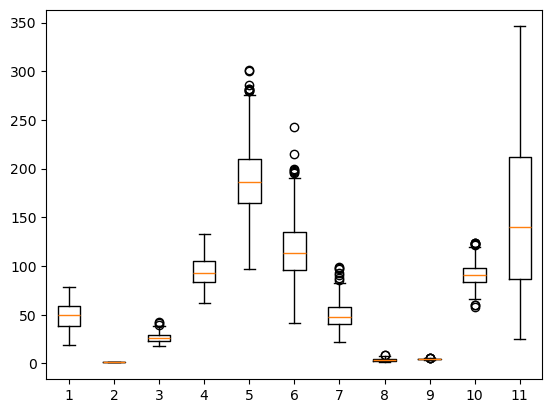

In [8]:
plt.boxplot(data)
plt.show()

In [9]:
K=data['Target']
data=data.drop(['Target'],axis=1)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
mk=MinMaxScaler()
KM=mk.fit_transform(data)
data=pd.DataFrame(KM,columns=data.columns)

In [12]:
from sklearn.feature_selection import mutual_info_regression

<function matplotlib.pyplot.show(close=None, block=None)>

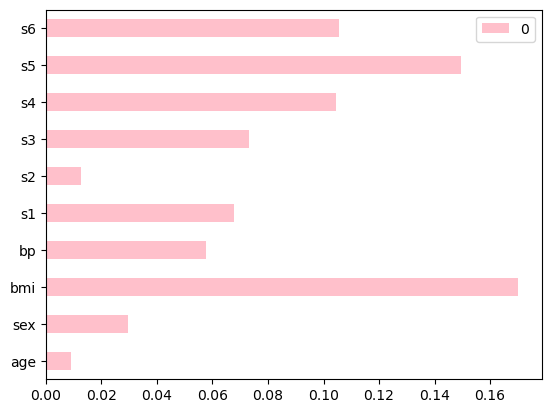

In [13]:
Mk=mutual_info_regression(data,K,random_state=69)
Km=pd.DataFrame(Mk,data.columns)
Km.plot(kind='barh',color='pink')
plt.show

In [14]:
M=data

In [15]:
data=data.drop(['sex','s1','s2'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(data,K,random_state=42,test_size=0.3)

In [18]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [19]:
OK=SVR(kernel='rbf',gamma='auto',C=100)
OK.fit(xtrain,ytrain)

SVR(C=100, gamma='auto')

In [20]:
ypred=OK.predict(xtest)
r2_score(ytest,ypred)

0.45963110394976325

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
params = {'C':[0.1,10,100,0.01],'kernel':['rbf','linear','poly'],'gamma':['scale','auto']}
Grid = GridSearchCV(OK,params,cv=4)
Grid.fit(xtrain,ytrain)

GridSearchCV(cv=4, estimator=SVR(C=100, gamma='auto'),
             param_grid={'C': [0.1, 10, 100, 0.01], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']})

In [23]:
ypred=Grid.predict(xtest)
r2_score(ytest,ypred)

0.45963110394976325

In [24]:
Grid.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

In [25]:
def svm_kernels(feat,target):
    xtrain, xtest, ytrain, ytest = train_test_split(feat,target, test_size=0.3, random_state=42)
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    accuracy=[]
    for i in kernels:
        OK=SVR(kernel=i,gamma='auto',C=100)
        OK.fit(xtrain,ytrain)
        ypred=OK.predict(xtest)
        acc=r2_score(ytest,ypred)
        accuracy.append(acc)
        
    return accuracy     
accuracies=svm_kernels(data,K)   
print(accuracies)    

[0.46197264424914575, 0.3872268882676909, 0.45963110394976325, 0.44701864953844817]


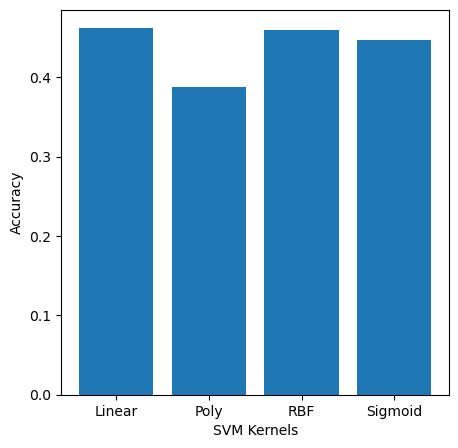

In [26]:
plt.figure(figsize=(5, 5))
plt.bar(np.arange(len(accuracies)), accuracies)
plt.xticks(np.arange(len(accuracies)), ['Linear', 'Poly', 'RBF', 'Sigmoid'])
plt.xlabel('SVM Kernels')
plt.ylabel('Accuracy')
plt.show()